In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,text,sex,age,event
0,57YOM WITH CONTUSION TO FACE AFTER STRIKING IT...,1,57,62
1,A 45YOM FELL ON ARM WHILE WORKING HAD SLIPPED ...,1,45,42
2,58YOM WITH CERVICAL STRAIN BACK PAIN S P REST...,1,58,26
3,33 YOM LAC TO HAND FROM A RAZOR KNIFE,1,33,60
4,53YOM AT WORK IN A WAREHOUSE DOING UNSPECIFIED...,1,53,71


In [4]:
text = data['text']

In [5]:
ages = np.array(list(data['age']))

In [6]:
ages[:10]

array([57, 45, 58, 33, 53, 31, 54, 60, 36, 41])

In [7]:
injury_desc = []
for index, entry in data.iterrows():
    text = entry['text']
    text = text.lower()
    injury_desc.append(text)
    if "yom" in text:
        try:
            found = False
            pre, post = text.split("yom")
            pre_list = pre.split(" ")
            for p in pre_list:
                if p.isnumeric() and int(p) == ages[index]:
                    found = True
                    break
            if not found:
                print("Entry {}".format(index))
                print("\tText: {}".format(text))
        except ValueError:
            print("Funny entry {}: {}".format(index, text))

Entry 7148
	Text: o33 yom dx sprain strain back  s p bibems pt is subject firefighter withlower back pain due to slipping on ice on a roof
Entry 9048
	Text: head inj 20yowf wk sts a 26yom resident that she cares for hit her w closed fist mult times in face grabbed neck 2 hrs ago
Entry 12412
	Text: pai23 yom was unloading boxes off a truck suddenly experienced low back pain  pain  lower back
Funny entry 12581: 46 yom dx yom dx laceraration of rt leg  s p pt c o 2 lacerations of lower leg while at work
Entry 16874
	Text: 331yom splenic laceration abd pain using skid loader plowing snow hit manhole cover flew forward hit abd  pt transfered
Entry 22654
	Text: 30ym wks in psych ward got bitten to arm by 11yom    abrs human bite
Funny entry 25858: a 48yom was arresting a 17yom was bit on arm dx humanbite to arm
Entry 28077
	Text: a36yom unrestrained driver in mva hit by car that ran red lite back pain
Entry 31017
	Text: t54 yom was attempting to phsically restrain inmate pt fell on  inmate s

In [8]:
injury_desc[:10]

['57yom with contusion to face after striking it with a post pounder while setting a fence post',
 'a 45yom fell on arm while working had slipped on water fx wrist',
 '58yom with cervical strain  back pain s p restrained taxi driver in low speed rear end mvc no loc no ab deployed',
 '33 yom lac to hand from a razor knife',
 '53yom at work in a warehouse doing unspecified lifting and strained lo wer back',
 '31yom at a clients home trimming a tree with a chain saw and the saw kicked back hit lower arm laceration to lower arm',
 '54 yo male cut finger sharpening a knife at work dx right index fingerlaceration b',
 '60 yom states he was working in a wood shop yesterday and felt   something go into his rt ear dx fb removal rt ear canal',
 '36 yo m c o b l back pain since fri worse today pt lifts heavy trash bags at work dx lumbar strain',
 '41yof shoulder pain after lifting a package at work']

In [9]:
injury_dlen = np.array([len(x) for x in injury_desc])

In [10]:
np.argmax(injury_dlen)

27

In [11]:
injury_dlen[27]

142

In [12]:
injury_desc[27]

'66 yo f employee presetns after tripping over iv tubing in dark room and falling forward into the wall c o face rt knee pain dx c h i trap spa'

(array([  456.,  4672., 15414., 24865., 26145., 23284., 19078., 15469.,
        12968., 11605.]),
 array([ 21. ,  33.1,  45.2,  57.3,  69.4,  81.5,  93.6, 105.7, 117.8,
        129.9, 142. ]),
 <a list of 10 Patch objects>)

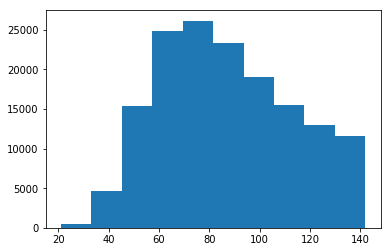

In [13]:
plt.hist(injury_dlen)

In [14]:
labels = np.array(data['event'])

In [15]:
events = sorted(set(labels))

(array([14429.,     0.,   381.,  4648.,  1234.,     0.,  1562., 22559.,
           52.,  4877., 11678., 42498.,  7362., 32085.,  8318.,   900.,
            0.,     0.,     0.,  1373.]),
 array([10.  , 14.45, 18.9 , 23.35, 27.8 , 32.25, 36.7 , 41.15, 45.6 ,
        50.05, 54.5 , 58.95, 63.4 , 67.85, 72.3 , 76.75, 81.2 , 85.65,
        90.1 , 94.55, 99.  ]),
 <a list of 20 Patch objects>)

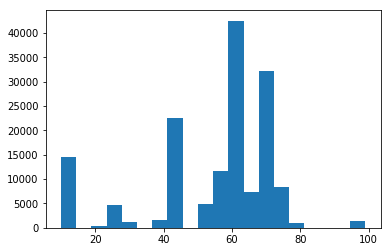

In [16]:
plt.hist(labels, bins=20)

Let's build vocabulary dictionaries for the words in the incident descriptions.

In [17]:
id2word = {}
word2id = {}
index = 0
for line in injury_desc:
    tokens = line.split(" ")
    for t in tokens:
        if t not in word2id:
            word2id[t] = index
            id2word[index] = t
            index += 1

In [18]:
len(id2word)

35632

In [19]:
incident_tokens = {}
for index, text in enumerate(injury_desc):
    incident = labels[index]
    if incident not in incident_tokens:
        incident_tokens[incident] = []
    tokens = text.split(" ")
    for t in tokens:
        if t not in incident_tokens[incident]:
            incident_tokens[incident].append(t)

In [20]:
incident_tokens[10]

['51yom',
 'pain',
 'to',
 'l',
 '5th',
 'finger',
 'when',
 'responding',
 'a',
 'situation',
 'at',
 'work',
 'and',
 'broke',
 'out',
 'inring',
 '',
 'fx',
 '30yom',
 'wrestling',
 'w',
 'another',
 'person',
 'weights',
 '300lb',
 'landed',
 'on',
 'hand',
 'all',
 'occured',
 'dx',
 'sprain',
 'low',
 'back']

In [21]:
for ev in events:
    print("Words for event {}: {}".format(ev, len(incident_tokens[ev])))

Words for event 10: 34
Words for event 11: 6382
Words for event 12: 3081
Words for event 13: 3807
Words for event 20: 121
Words for event 21: 277
Words for event 22: 357
Words for event 23: 873
Words for event 24: 1802
Words for event 25: 521
Words for event 26: 3041
Words for event 27: 2040
Words for event 29: 15
Words for event 30: 24
Words for event 31: 2017
Words for event 32: 1230
Words for event 40: 336
Words for event 41: 1939
Words for event 42: 7361
Words for event 43: 4837
Words for event 44: 1049
Words for event 45: 189
Words for event 49: 272
Words for event 50: 246
Words for event 51: 1562
Words for event 52: 1137
Words for event 53: 4164
Words for event 54: 131
Words for event 55: 8994
Words for event 56: 90
Words for event 59: 71
Words for event 60: 4821
Words for event 61: 335
Words for event 62: 10727
Words for event 63: 5856
Words for event 64: 3974
Words for event 65: 359
Words for event 66: 2800
Words for event 67: 433
Words for event 69: 619
Words for event 70: 442

In [22]:
word_count_by_cat = {}
for word in id2word.values():
    word_count_by_cat[word] = 0
    for cat in events:
        if word in incident_tokens[cat]:
            word_count_by_cat[word] += 1

In [23]:
word_dist = [count for count in word_count_by_cat.values()]

(array([3.0724e+04, 2.3120e+03, 9.0200e+02, 7.0200e+02, 3.5300e+02,
        3.0600e+02, 2.0000e+02, 6.8000e+01, 4.5000e+01, 2.0000e+01]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <a list of 10 Patch objects>)

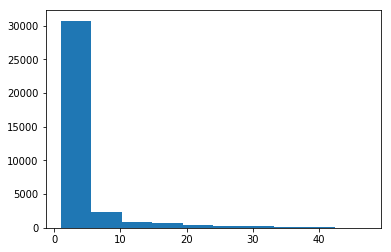

In [24]:
plt.hist(word_dist)